# Overfitting

When we are training a model, for example a Random forest or a linear regression, and the model fits very well the training data, but not the validation/testing data, we have overffiting. For example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
rng = np.random.RandomState(0) 
# If we change the value multiplying pi, we have a different shape,
# if we change num we will perceive that big datasets may not suffer from overfitting
x = np.linspace(0, 0.8 * np.pi, num=15)

# adding some noise to the data
n = np.random.normal(scale=7, size=x.size)

y = 150 * np.sin(x) + n


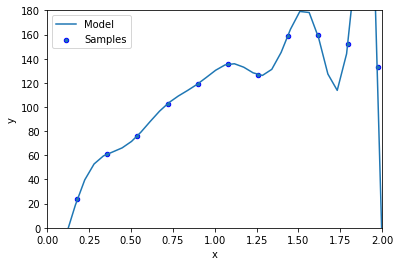

In [3]:
polynomial_features = PolynomialFeatures(degree=22, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(np.array(x).reshape(-1, 1), y)

X_test = np.linspace(0, 10, 180)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(np.array(x).reshape(-1, 1), y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 2))
plt.ylim((0, 180))
plt.legend(loc="best")

plt.show()

In this situation we have overfitting. Our model get's all points. Lets see how a more real model should look like

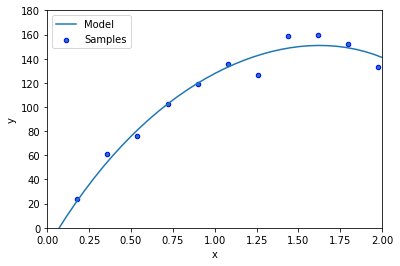

In [4]:
polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(np.array(x).reshape(-1, 1), y)

X_test = np.linspace(0, 10, 180)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.scatter(np.array(x).reshape(-1, 1), y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 2))
plt.ylim((0, 180))
plt.legend(loc="best")

plt.show()
